In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prajwal3009","key":"6639023f25b4ca1b3684c72389c6c38c"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d ravirajsinh45/region-proposals-of-crop-weed-dataset
!kaggle datasets download -d ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes

Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/region-proposals-of-crop-weed-dataset
License(s): unknown
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 117MB/s]
Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes
License(s): CC0-1.0
 86% 68.0M/79.2M [00:00<00:00, 101MB/s]
100% 79.2M/79.2M [00:00<00:00, 109MB/s]


In [4]:
!unzip "/content/crop-and-weed-detection-data-with-bounding-boxes.zip"
!unzip "/content/region-proposals-of-crop-weed-dataset.zip"

Archive:  /content/crop-and-weed-detection-data-with-bounding-boxes.zip
  inflating: agri_data/data/agri_0_1009.jpeg  
  inflating: agri_data/data/agri_0_1009.txt  
  inflating: agri_data/data/agri_0_1017.jpeg  
  inflating: agri_data/data/agri_0_1017.txt  
  inflating: agri_data/data/agri_0_1018.jpeg  
  inflating: agri_data/data/agri_0_1018.txt  
  inflating: agri_data/data/agri_0_1020.jpeg  
  inflating: agri_data/data/agri_0_1020.txt  
  inflating: agri_data/data/agri_0_1024.jpeg  
  inflating: agri_data/data/agri_0_1024.txt  
  inflating: agri_data/data/agri_0_1026.jpeg  
  inflating: agri_data/data/agri_0_1026.txt  
  inflating: agri_data/data/agri_0_1028.jpeg  
  inflating: agri_data/data/agri_0_1028.txt  
  inflating: agri_data/data/agri_0_1041.jpeg  
  inflating: agri_data/data/agri_0_1041.txt  
  inflating: agri_data/data/agri_0_1053.jpeg  
  inflating: agri_data/data/agri_0_1053.txt  
  inflating: agri_data/data/agri_0_106.jpeg  
  inflating: agri_data/data/agri_0_106.txt  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')

In [14]:
train_json = '/content/train.json'
test_json = '/content/test.json'
images_path = '/content/agri_data/data/'

In [8]:
with open(train_json,'r') as train:
    train_data = json.load(train)

In [9]:
with open(test_json,'r') as test:
    test_data = json.load(test)

In [10]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())

In [11]:
os.mkdir('Train')
os.mkdir('Test')

In [12]:
os.mkdir('Train/weed')
os.mkdir('Train/crop')
os.mkdir('Train/background')

os.mkdir('Test/weed')
os.mkdir('Test/crop')
os.mkdir('Test/background')

In [15]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)


    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]

        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)

        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)


    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'

        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)

        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

1000it [07:55,  2.10it/s]


In [16]:
#For Testing
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)


    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]

        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)

        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) +'.jpeg',temp_img)


    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'

        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)

        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) + '.jpeg',temp_img)

300it [01:13,  4.06it/s]


In [17]:
print('Total training weed images are {}'.format(len(os.listdir('Train/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Train/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Train/background'))))

Total training weed images are 7721
Total training crop images are 10298
Total training background images are 35350


In [18]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

Total testing weed images are 2331
Total testing crop images are 3147
Total testing background images are 10769


In [20]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

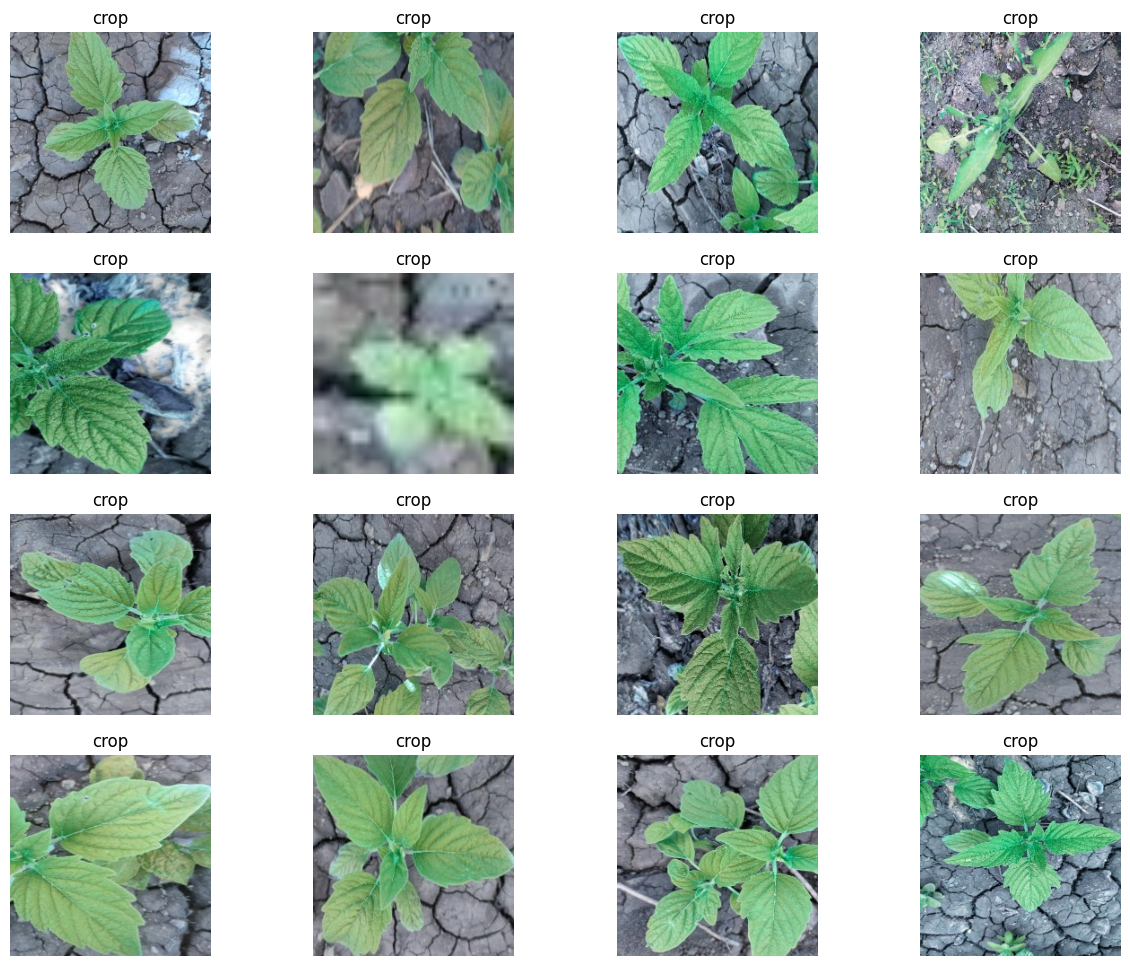

In [19]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

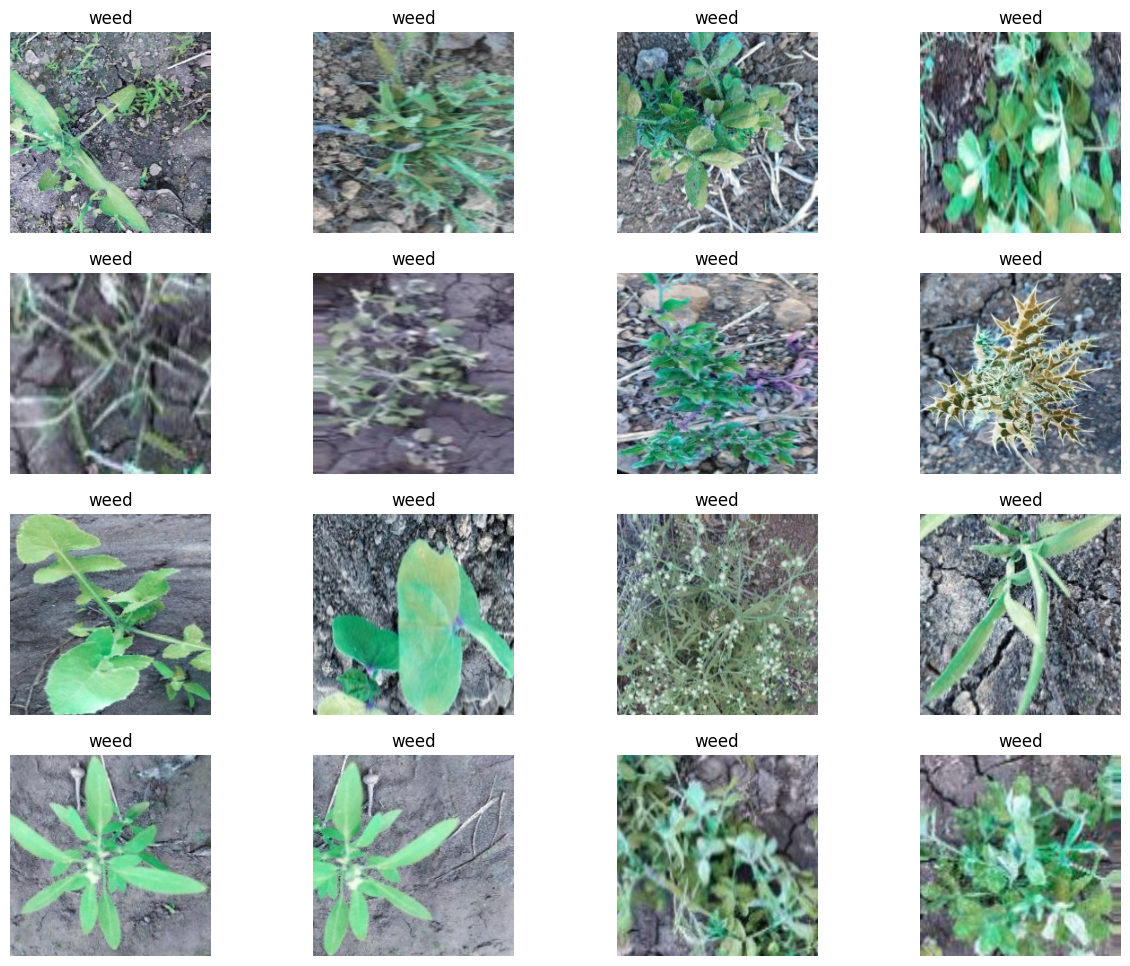

In [21]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Train/weed')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Train/weed/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [23]:
train_path = '/content/Train/'
test_path = '/content/Test/'

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
BATCH_SIZE = 64
IMAGE_SIZE = (224,224,3)

In [26]:
train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 subset='training')

val_data = train_generator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=False,
                                                 subset='validation')

test_generator  = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 class_mode="categorical",shuffle=False,
                                                 batch_size=BATCH_SIZE)

Found 42696 images belonging to 3 classes.
Found 10673 images belonging to 3 classes.
Found 16247 images belonging to 3 classes.


In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=IMAGE_SIZE))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4096, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

for layer in baseModel.layers:
    layer.trainable = False

model = Model(inputs=baseModel.input, outputs=headModel)

opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

58889256/58889256 [==============================] - 1s 0us/step


In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
early_stop = EarlyStopping(patience=2,monitor='val_loss')

In [31]:
results = model.fit_generator(train_data,epochs=20,
                              validation_data=val_data,
                             callbacks=[early_stop])

Epoch 1/20
668/668 [==============================] - 268s 379ms/step - loss: 0.3870 - accuracy: 0.9338 - val_loss: 0.1825 - val_accuracy: 0.9455
Epoch 2/20
668/668 [==============================] - 259s 388ms/step - loss: 0.1699 - accuracy: 0.9482 - val_loss: 0.1595 - val_accuracy: 0.9491
Epoch 3/20
668/668 [==============================] - 258s 386ms/step - loss: 0.1475 - accuracy: 0.9525 - val_loss: 0.1604 - val_accuracy: 0.9544
Epoch 4/20
668/668 [==============================] - 249s 373ms/step - loss: 0.1338 - accuracy: 0.9559 - val_loss: 0.1502 - val_accuracy: 0.9545
Epoch 5/20
668/668 [==============================] - 245s 367ms/step - loss: 0.1265 - accuracy: 0.9578 - val_loss: 0.1648 - val_accuracy: 0.9548
Epoch 6/20
668/668 [==============================] - 244s 365ms/step - loss: 0.1437 - accuracy: 0.9484 - val_loss: 0.1567 - val_accuracy: 0.9574


In [32]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

<Axes: >

<Axes: >

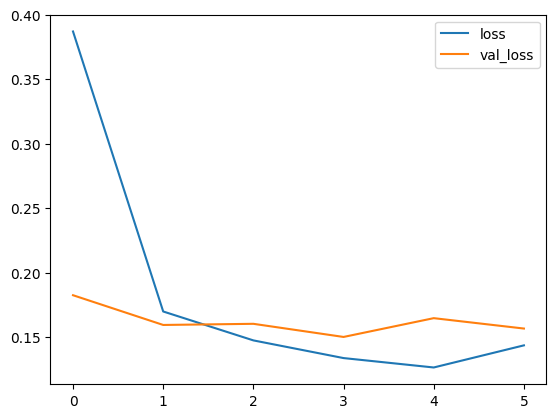

In [33]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [34]:
test_pred = model.predict_generator(test_data)

In [35]:
pred_class = [np.argmax(x) for x in test_pred]

In [36]:
test_data.class_indices

{'background': 0, 'crop': 1, 'weed': 2}

In [37]:
true_class = test_data.classes

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_class,pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10769
           1       0.97      0.95      0.96      3147
           2       0.95      0.94      0.94      2331

    accuracy                           0.98     16247
   macro avg       0.97      0.96      0.96     16247
weighted avg       0.98      0.98      0.98     16247



<Axes: >

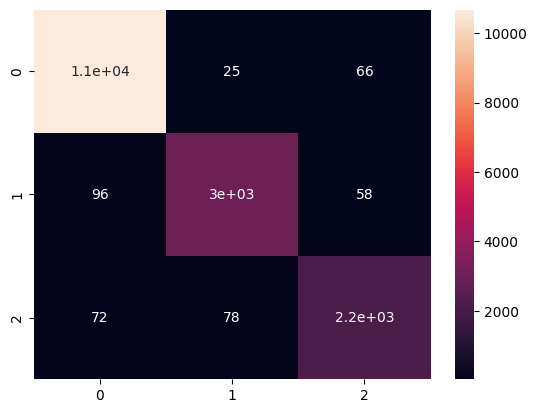

In [39]:
sns.heatmap(confusion_matrix(true_class,pred_class),annot=True)

In [40]:
mapping_class = test_data.class_indices
mapping_class = dict([(value, key) for key, value in mapping_class.items()])

1/1 [==============================] - 0s 17ms/step


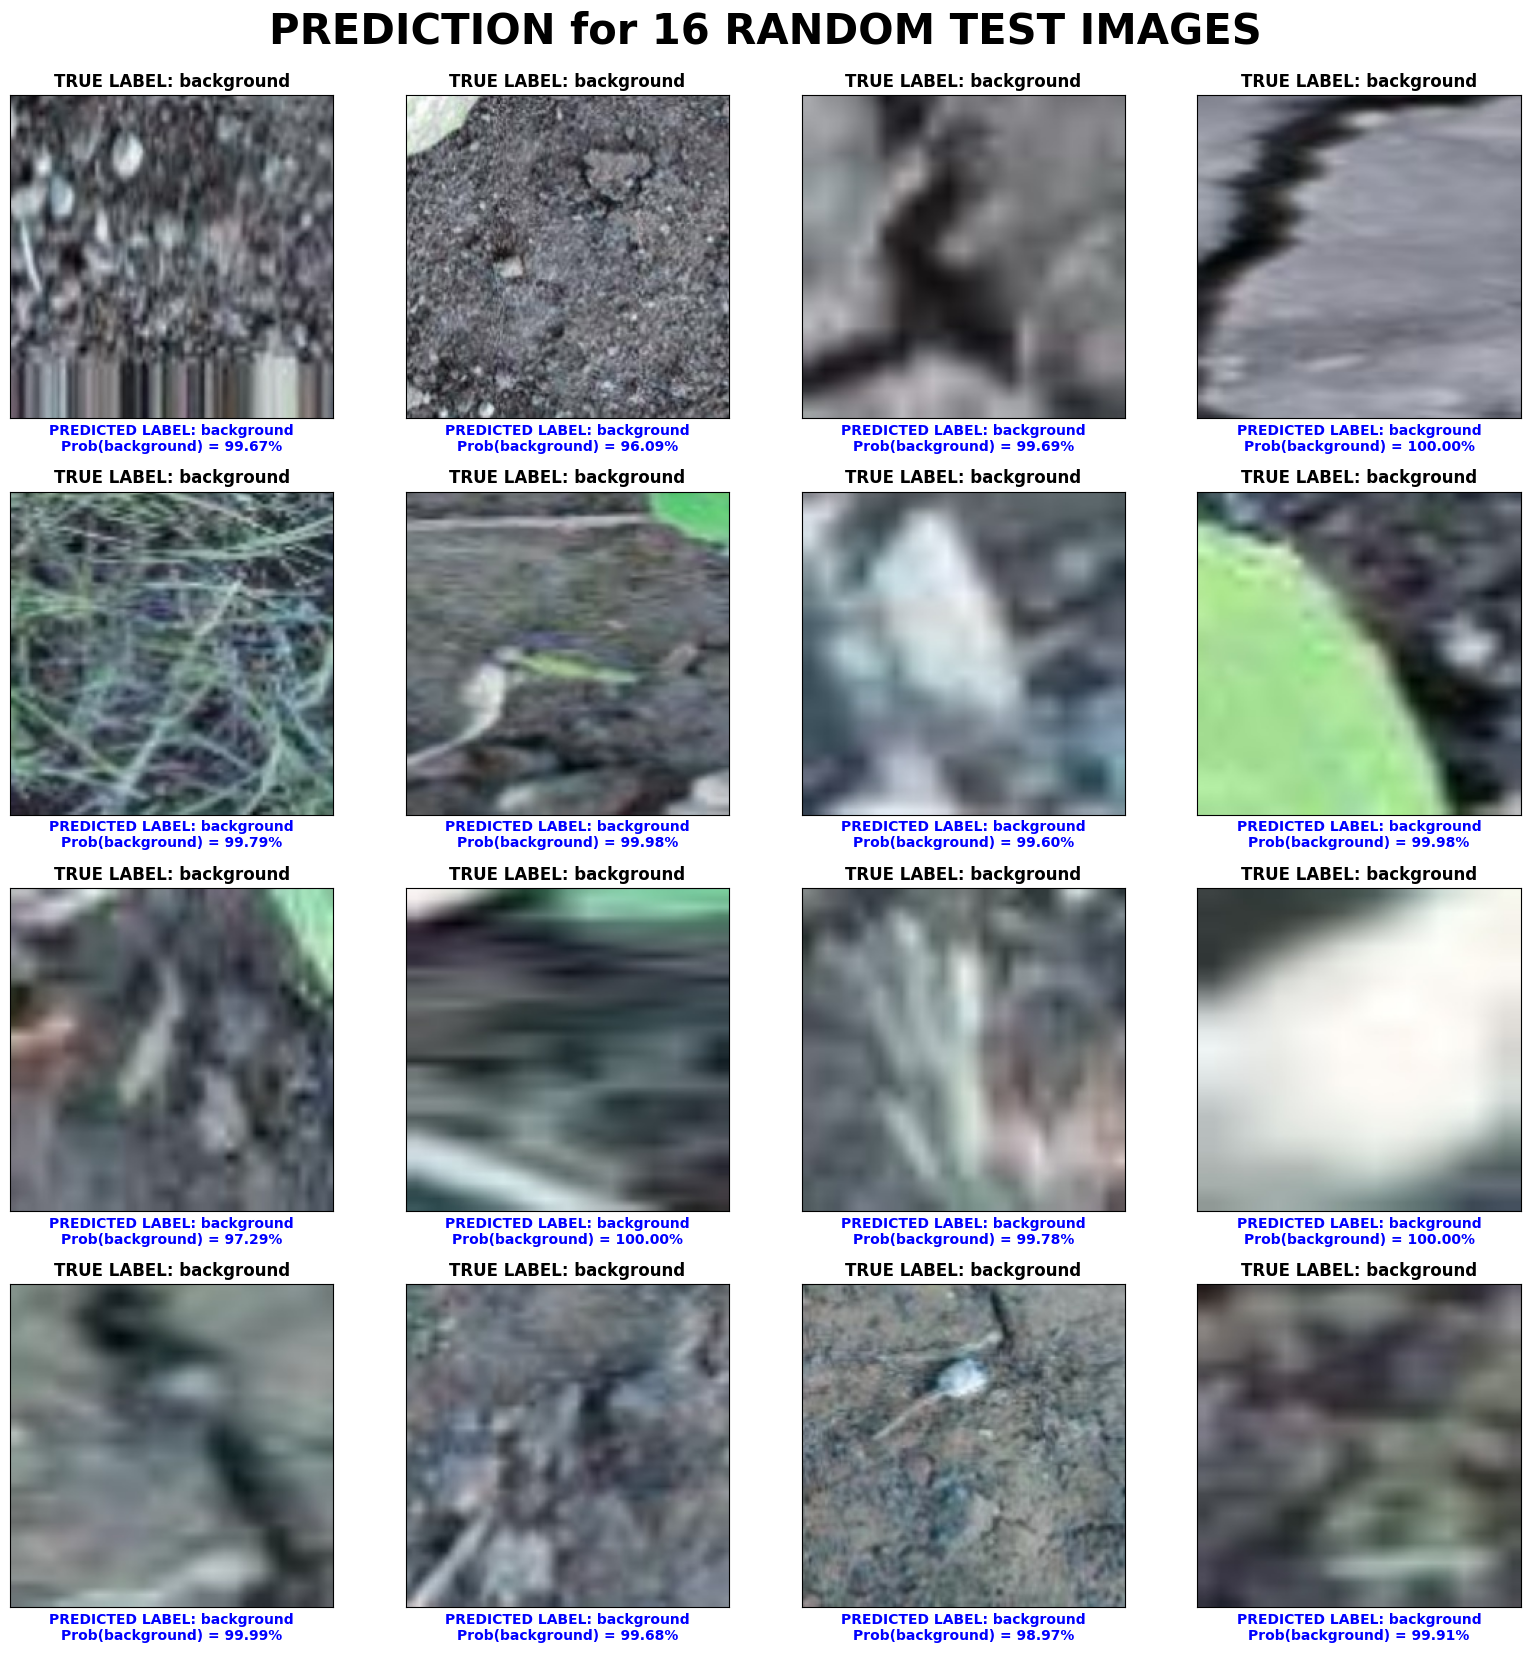

In [41]:
images, labels = next(iter(test_data))
images = images.reshape(64, 224,224,3)
fig, axes = plt.subplots(4, 4, figsize=(16,16))

for ax, img, label in zip(axes.flat, images[:16], labels[:16]):
    ax.imshow(img)
    true_label = mapping_class[np.argmax(label)]

    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]

    prob_class = np.max(pred_prob) * 100

    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
fig.suptitle("PREDICTION for 16 RANDOM TEST IMAGES", size = 30, y = 1.03, fontweight = "bold")
plt.show()

In [42]:
misclassify_pred = np.nonzero(true_class != pred_class)[0]
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for ax, batch_num, image_num in zip(axes.flat, misclassify_pred // BATCH_SIZE, misclassify_pred % BATCH_SIZE):
    images, labels = test_data[batch_num]
    img = images[image_num]
    ax.imshow(img.reshape(*IMAGE_SIZE))

    true_label = mapping_class[np.argmax(label)]

    pred_prob = model.predict(img.reshape(1, 224,224, 3))
    pred_label = mapping_class[np.argmax(pred_prob)]

    prob_class = np.max(pred_prob)*100


    ax.set_title(f"TRUE LABEL: {true_label}", fontweight = "bold", fontsize = 12)
    ax.set_xlabel(f"PREDICTED LABEL: {pred_label}\nProb({pred_label}) = {(prob_class):.2f}%",
                 fontweight = "bold", fontsize = 10,
                 color = "blue" if true_label == pred_label else "red")

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
fig.suptitle(f"MISCLASSIFIED TEST IMAGES ({len(misclassify_pred)} out of {len(true_class)})",
             size = 20, y = 1.03, fontweight = "bold")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
model.save('RCNN_crop_weed_classification_model.h5')

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

In [45]:
path = '/content/agri_data/data/'

In [46]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [47]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [48]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

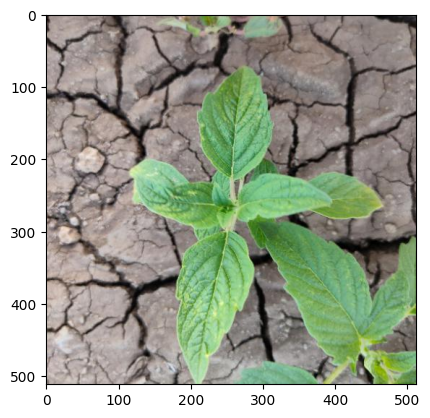

In [49]:
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [50]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r')
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]

    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[78:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:02<00:00, 593.45it/s]


In [51]:
df.head()

image_name object     x_cen     y_cen         w         h
0                 0  0.555664  0.541992  0.818359  0.912109
1                 1  0.464844  0.583984  0.515625  0.300781
2                 0  0.549805  0.508789  0.853516  0.498047
3                 0  0.805664  0.782227  0.373047  0.435547
4                 0  0.396484   0.50293  0.710938  0.994141

In [52]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [53]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):

    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512
    if df.loc[i,'object'] == 0:
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512)

100%|██████████| 2072/2072 [00:01<00:00, 1142.23it/s]


In [54]:
pascal_voc

filename width height class xmin ymin xmax ymax
0               512    512  crop   75   44  493  510
1               512    512  weed  106  221  370  375
2               512    512  crop   63  132  500  388
3               512    512  crop  316  289  508  512
4               512    512  crop   20    3  384  512
...       ...   ...    ...   ...  ...  ...  ...  ...
2067            512    512  crop  264   20  297   50
2068            512    512  crop  420  171  462  200
2069            512    512  crop    7    8   68   37
2070            512    512  crop   35    8  512  484
2071            512    512  weed   11    2  476  379

[2072 rows x 8 columns]

In [ ]:
any_index_number = 55 #change this number for different images
img = cv2.imread(path+pascal_voc.loc[any_index_number,'filename'])
if img is None:
    print(f"Image not loaded. Check the file path: {path+pascal_voc.loc[any_index_number,'filename']}")
else:
    test_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):

    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1)
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)

plt.figure(figsize=(8,8))
plt.imshow(text)
plt.axis('off')
plt.show()

In [56]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [58]:
train_json = '/content/train.json'
test_json = '/content/test.json'
images_path = '/content/agri_data/data/'
model_path  = '/content/RCNN_crop_weed_classification_model.h5'
label_csv = '/content/pascal_voc_format.csv'
negative_ex_path = '/content/Train/background/'

In [59]:
with open(train_json,'r') as train:
    train_region = json.load(train)

In [60]:
with open(test_json,'r') as test:
    test_region = json.load(test)

In [61]:
train_images_list = list(train_region.keys())
test_images_list = list(test_region.keys())

In [62]:
print(len(train_images_list))
print(len(test_images_list))

1000
300


In [63]:
labels = pd.read_csv(label_csv)
labels.head()

filename  width  height class  xmin  ymin  xmax  ymax
0       NaN    512     512  crop    75    44   493   510
1       NaN    512     512  weed   106   221   370   375
2       NaN    512     512  crop    63   132   500   388
3       NaN    512     512  crop   316   289   508   512
4       NaN    512     512  crop    20     3   384   512

In [64]:
model = tf.keras.models.load_model(model_path)

In [65]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [66]:
model_without_last_2FC = tf.keras.models.Model(model.inputs,model.layers[-5].output)

In [68]:
model_without_last_2FC.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
train_features = []

test_features = []


for index in tqdm(range(len(labels))):
    id = labels.loc[index,'filename']
    img = cv2.imread(images_path + id)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    xmin,ymin,xmax,ymax = int(labels.loc[index,'xmin']) ,int(labels.loc[index,'ymin']),int(labels.loc[index,'xmax']),int(labels.loc[index,'ymax'])

    resized = cv2.resize(rgb_img[ymin:ymax,xmin:xmax,:],(224,224))

    feature_of_img = model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255)

    if id in train_images_list:

        train_features.append([feature_of_img,labels.loc[index,'class']])

    else:
        test_features.append([feature_of_img,labels.loc[index,'class']])

In [71]:
print(len(train_features))

print(len(test_features))

0
0


In [ ]:
for index,img in tqdm(enumerate(os.listdir(negative_ex_path)[:5000])):  #only extracting for 10,000 images
    img = cv2.imread(negative_ex_path + img )
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #images already in (224,224,3)
    feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)
    if index<3500:
        train_features.append([feature_of_img,'background'])
    else:
        test_features.append([feature_of_img,'background'])

In [ ]:
import random
random.shuffle(train_features)

In [ ]:
X_train = np.array([x[0] for x in train_features])
X_train = X_train.reshape(-1,4096)

In [ ]:
X_train.shape

In [ ]:
y_train = [x[1] for x in train_features]
y_train = np.array(y_train).reshape(-1,1)

In [ ]:
y_train.shape

In [ ]:
X_test = np.array([x[0] for x in test_features])
X_test = X_test.reshape(-1,4096)

In [ ]:
y_test = [x[1] for x in test_features]
y_test = np.array(y_test).reshape(-1,1)

SVM **TRAINING**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [ ]:
accuracy = svm_model_linear.score(X_test, y_test)

In [ ]:
accuracy

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
img = cv2.imread(negative_ex_path + os.listdir(negative_ex_path)[45] )
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
feature_of_img = model_without_last_2FC.predict(rgb.reshape(1,224,224,3)/255)

In [ ]:
svm_model_linear.predict(feature_of_img)

In [ ]:
svm_model_linear.predict_proba(feature_of_img)

In [ ]:
svm_model_linear.classes_

In [ ]:
img = cv2.imread(images_path+'agri_0_1024.jpeg')
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
resized = cv2.resize(rgb,(224,224))

In [ ]:
plt.imshow(resized)

In [ ]:
svm_model_linear.predict_proba(model_without_last_2FC.predict(resized.reshape(1,224,224,3)/255))

In [ ]:
import pickle

with open('svm_classifier.pkl','wb') as svm_model:
    pickle.dump(svm_model_linear , svm_model)

In [ ]:
!pip uninstall opencv-python -y

In [ ]:
!pip install opencv-contrib-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import json
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
model_path = '/content/RCNN_crop_weed_classification_model.h5'
test_img_path = '/content/Test/'
images_path = '/content/agri_data/data/'
svm_model_path = '/content/svm_classifier.pkl'
images_name = [x for x in os.listdir(images_path) if x.endswith('.jpeg')]

In [ ]:
model = tf.keras.models.load_model(model_path)

In [ ]:
model.summary()

In [ ]:
model_without_last_two_fc = tf.keras.models.Model(model.inputs,model.layers[-5].output)

In [ ]:
model_without_last_two_fc.summary()

In [ ]:
with open(svm_model_path,'rb') as svm:
    svm_model = pickle.load(svm)

In [ ]:
def iou_calc(bb1 , bb2):

    true_xmin, true_ymin, true_width, true_height  = bb1
    bb_xmin, bb_ymin,  bb_width, bb_height = bb2

    true_xmax = true_xmin + true_width
    true_ymax = true_ymin + true_height
    bb_xmax = bb_xmin + bb_width
    bb_ymax = bb_ymin + bb_height

    #calculating area
    true_area = true_width * true_height
    bb_area   = bb_width * bb_height

    #calculating itersection cordinates
    inter_xmin = max(true_xmin , bb_xmin)
    inter_ymin = max(true_ymin , bb_ymin)
    inter_xmax = min(true_xmax , bb_xmax)
    inter_ymax = min(true_ymax , bb_ymax)

    if inter_xmax <= inter_xmin or inter_ymax <= inter_ymin:
        iou = 0


    else:
        inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)


        iou = inter_area / (true_area + bb_area - inter_area)

    assert iou<=1
    assert iou>=0

    return iou

In [ ]:
def detection(img_path,confidence=0.9,iou_thresh=0.1):

    # appling selective search
    img = plt.imread(img_path)
    cv2.setUseOptimized(True);
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    sel_rects = rects[:2000]

    pred_crop=[]
    pred_weed=[]
    for index, rect in tqdm(enumerate(sel_rects)):

        x,y,w,h = rect
        roi = img[y:y+h,x:x+w,:]
        resized_roi = cv2.resize(roi,(224,224))/255

        # Feature extraction

        feature = model_without_last_two_fc.predict(resized_roi.reshape(-1,224,224,3))

        # SVM prediction
        pred = svm_model.predict_proba(feature.reshape(-1,4096))
        pred_lab=svm_model.predict(feature.reshape(-1,4096))

        if pred_lab == 'crop' and np.max(pred)>confidence:
            pred_crop.append([list(rect),np.max(pred)])
        elif pred_lab=='weed' and np.max(pred)>confidence:
            pred_weed.append([list(rect),np.max(pred)])

    final = []

    # Detection for crop class
    if len(pred_crop) != 0:
        pred_score_crop = [x[1] for x in pred_crop]
        pred_bb_crop = [x[0] for x in pred_crop]

        for i in range(len(pred_crop)):
            temp_bb , temp_score = pred_bb_crop.copy() , pred_score_crop.copy()
            if len(temp_bb) !=0:

                max_score_box = temp_bb[np.argmax(temp_score)]

                if [max_score_box,np.max(temp_score)] not in final:
                    final.append([max_score_box,np.max(temp_score),'crop'])
                    index_should_del = []

                    for ind,other_bb in enumerate(temp_bb):
                        iou_score = iou_calc(max_score_box , other_bb)

                        # Non maximum suppression(nms)

                        if iou_score >= iou_thresh:
                            index_should_del.append(ind)

                    pred_bb_crop    = []
                    pred_score_crop = []
                    for bb_index ,bb_value in enumerate(temp_bb) :
                        if bb_index not in index_should_del:
                            pred_bb_crop.append(bb_value)

                    for score_index ,score_value in enumerate(temp_score) :
                        if score_index not in index_should_del:
                            pred_score_crop.append(score_value)
                else:
                    continue

            else:
                break

    # Detection for weed class

    if len(pred_weed) != 0:
        pred_score_weed = [x[1] for x in pred_weed]
        pred_bb_weed = [x[0] for x in pred_weed]

        for i in range(len(pred_weed)):
            temp_bb , temp_score = pred_bb_weed.copy() , pred_score_weed.copy()
            if len(temp_bb) !=0:

                max_score_box = temp_bb[np.argmax(temp_score)]

                if [max_score_box,np.max(temp_score)] not in final:
                    final.append([max_score_box,np.max(temp_score),'weed'])
                    index_should_del = []

                    for ind,other_bb in enumerate(temp_bb):
                        iou_score = iou_calc(max_score_box , other_bb)

                        if iou_score >= iou_thresh:
                            index_should_del.append(ind)

                    pred_bb_weed    = []
                    pred_score_weed = []
                    for bb_index ,bb_value in enumerate(temp_bb) :
                        if bb_index not in index_should_del:
                            pred_bb_weed.append(bb_value)

                    for score_index ,score_value in enumerate(temp_score) :
                        if score_index not in index_should_del:
                            pred_score_weed.append(score_value)
                else:
                    continue

            else:
                break


    imOut = img.copy()
    for rect,score,cls in final:

        x,y,w,h = rect
        if cls == 'weed':
            color =(255,0,0)
        if cls == 'crop':
            color = (0,255,0)

        cv2.rectangle(imOut,(x,y),(x+w,y+h),color,2)

        cv2.putText(imOut,cls+':'+str(round(score*100,2)),(x,y-8),cv2.FONT_HERSHEY_SIMPLEX,1, color, 2, cv2.LINE_AA)
    plt.imshow(imOut)
    cv2.imwrite('prediction.jpeg',imOut)


    return final

In [ ]:
detection(images_path+images_name[500])

In [ ]:
detection(images_path+images_name[24])

In [ ]:
detection(images_path+images_name[1245])

In [ ]:
detection(images_path+images_name[1100])